# Let's create a clean DEM for the Adventdalen to Bjørndalen area

In [9]:
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import geopandas as gpd

import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('terrain')
terrain_truncated = truncate_colormap(cmap, 0.2, .9)

From https://data.npolar.no/dataset/dce53a47-c726-4845-85c3-a65b46fe2fea

I identified 2 DEM files that I will merge here:

In [6]:
DEM1 = rxr.open_rasterio('/home/clc/Desktop/svalbard_DEM/DEM1-NP_S0_DTM2_5_2009_13835_33_Longyearbyenomr/S0_DTM2_5_2009_13835_33_Longyearbyenomr.tif').squeeze() # Bjorndalen missing
DEM2 = rxr.open_rasterio('/home/clc/Desktop/svalbard_DEM/DEM2-NP_S0_DTM5_2011_25162_33/S0_DTM5_2011_25162_33.tif').squeeze()

DEM1 = DEM1.rio.reproject('EPSG:4326')
DEM2 = DEM2.rio.reproject('EPSG:4326')

DEM1 = DEM1.where(DEM1>-100).where(DEM1<10000)
DEM2 = DEM2.where(DEM2>-100).where(DEM2<10000)

## What do they look like?

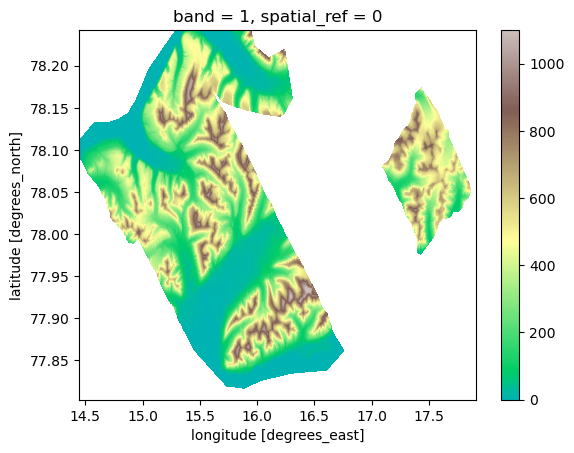

In [51]:
fig,ax = plt.subplots()
DEM1.plot(ax=ax, cmap=terrain_truncated, vmin=0, vmax=1100)
DEM2.plot(ax=ax, cmap=terrain_truncated, vmin=0, vmax=1100, add_colorbar=False)

In [7]:
print('lon min,              lon max,             lat min,             lat max')
[[ds.x.data.min(), ds.x.data.max(), ds.y.data.min(), ds.y.data.max()] for ds in [DEM1, DEM2]]

lon min,              lon max,             lat min,             lat max


[[15.319334302946466, 16.33350332815077, 78.13604547142502, 78.328326480353],
 [14.448298466820834, 17.911958899290305, 77.8033436661209, 78.24226939339269]]

### The two files have different resolutions

In [50]:
print('lon min,              lon max,             lat min,             lat max')
[[np.unique(np.diff(ds.x.data)), np.unique(np.diff(ds.y.data))] for ds in [DEM1, DEM2]]

lon min,              lon max,             lat min,             lat max


[[array([8.09263506e-05, 8.09263506e-05, 8.09263506e-05]),
  array([-8.09263506e-05, -8.09263505e-05])],
 [array([0.00018435, 0.00018435, 0.00018435, 0.00018435]),
  array([-0.00018435, -0.00018435])]]

# Let's interpolate the low-res DEM on the high-res grid